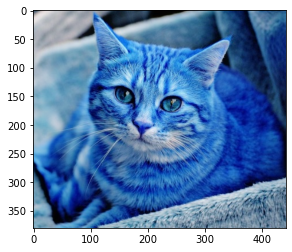

In [59]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('cat.jpg')#, cv2.IMREAD_GRAYSCALE)
plt.imshow(image)
plt.show()

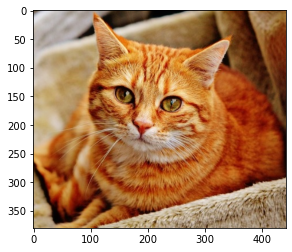

In [60]:
# 원본 파일
imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)
plt.show()

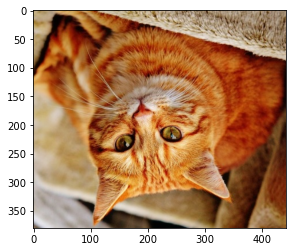

In [61]:
# 180도 회전
flip = cv2.flip(imgRGB, 0)
plt.imshow(flip)
plt.show()

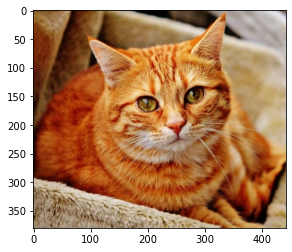

In [62]:
# 좌우반전
flip = cv2.flip(imgRGB, 1)
plt.imshow(flip)
plt.show()

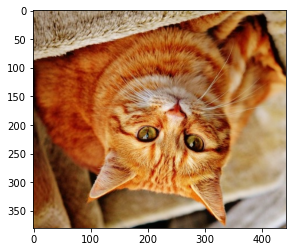

In [63]:
# 좌우반전 후 180도 회전
flip = cv2.flip(imgRGB, -1)
plt.imshow(flip)
plt.show()

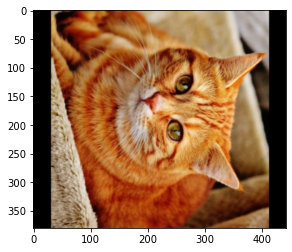

In [64]:
# 90도 회전
height, width, channel = imgRGB.shape
matrix = cv2.getRotationMatrix2D((width/2,height/2),-90.,1)
dst = cv2.warpAffine(imgRGB, matrix, (width, height))

plt.imshow(dst)

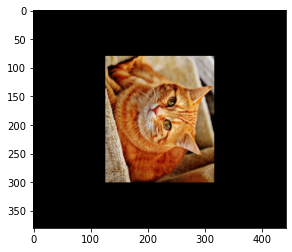

In [65]:
# 90도 회전 후 크기 조정

height, width, channel = imgRGB.shape

# center, angle, scale
# center로 중심점 설정 후 각도 지정하고 크기 지정
matrix = cv2.getRotationMatrix2D( (width/2,height/2) , -90 , 0.5)

dst = cv2.warpAffine(imgRGB, matrix, (width, height))

plt.imshow(dst)

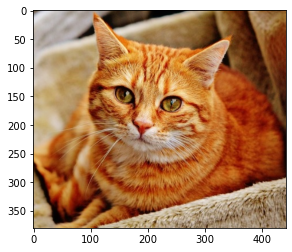

In [66]:
# 400 x 400
plt.imshow(imgRGB)

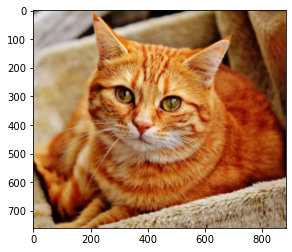

In [67]:
# 800 x 800
dst = cv2.pyrUp(imgRGB, dstsize = (width * 2, height * 2), borderType = cv2.BORDER_DEFAULT)
plt.imshow(dst)
# 픽셀이 커짐

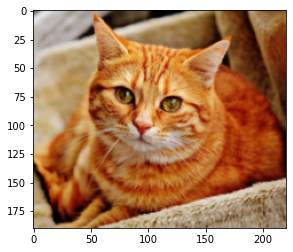

In [68]:
# 200 x 200
dst2 = cv2.pyrDown(imgRGB)
plt.imshow(dst2)

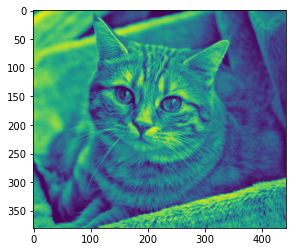

In [69]:
dst = cv2.cvtColor(imgRGB, cv2.COLOR_BGR2GRAY)
plt.imshow(dst)

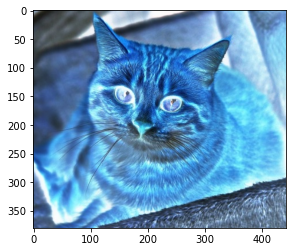

In [70]:
dst = cv2.bitwise_not(imgRGB)
plt.imshow(dst)

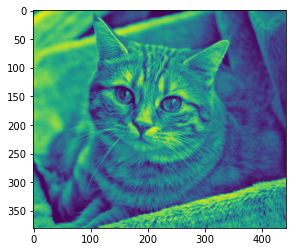

In [71]:
gray = cv2.cvtColor(imgRGB, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

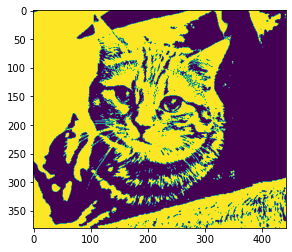

In [72]:
ret, dst = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
plt.imshow(dst)

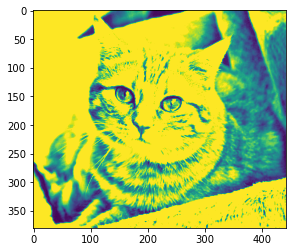

In [73]:
ret, dst = cv2.threshold(gray, 100, 255, cv2.THRESH_TRUNC)
plt.imshow(dst)

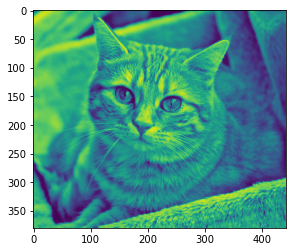

In [75]:
plt.imshow(image)

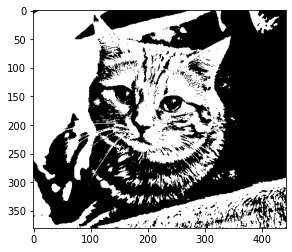

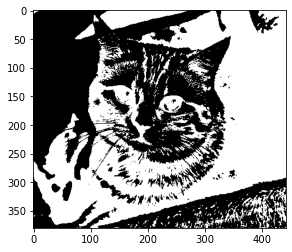

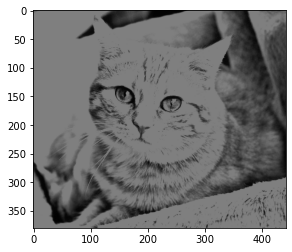

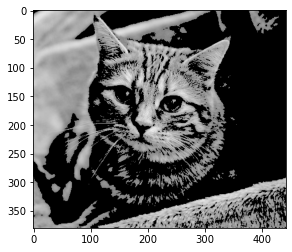

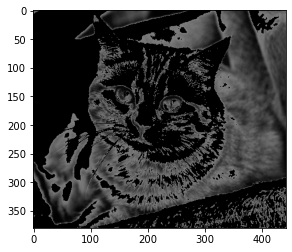

In [74]:
image = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)

images = []
ret, thres1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
ret, thres2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
ret, thres3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
ret, thres4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
ret, thres5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
images.append(thres1)
images.append(thres2)
images.append(thres3)
images.append(thres4)
images.append(thres5)

for i in images:
    plt.imshow(cv2.cvtColor(i, cv2.COLOR_GRAY2RGB))
    plt.show()


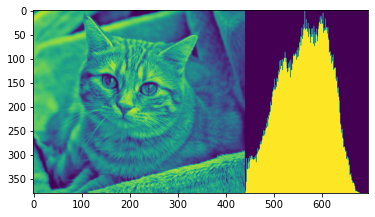

In [84]:
import cv2
import numpy as np

src = cv2.imread('cat.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
result = np.zeros((src.shape[0], 256), dtype = np.uint8)

hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
cv2.normalize(hist, hist, 0, result.shape[0], cv2.NORM_MINMAX)

for x, y in enumerate(hist):
    cv2.line(result, (int(x), result.shape[0]), (int(x), result.shape[0] - int(y)), 255)
    
dst = np.hstack([gray, result])

plt.imshow(dst)